# Visualización informe y presentación

In [3]:
import sys
import os

import pandas as pd
import numpy  as np

import matplotlib.pyplot        as plt
import matplotlib.font_manager  as fm

sys.path.append(os.path.abspath(os.path.join('..','..','iESPnet_SRC_main','utilities')))
from Generator         import SeizureDatasetLabelTime, SeizureDatasetLabelTimev2, smoothing_label

## iEEG

In [4]:
# direccion donde se encuentran los datos 
data_ieeg = '/media/martin/Disco2/Rns_Data/PITT_PI_EEG/'
meta_data = '/media/martin/Disco2/Rns_Data/PITT_PI_EEG/METADATA/allfiles_metadata.csv'

In [5]:
df_meta = pd.read_csv(meta_data)

In [6]:
out_address = '/home/martin/Documentos/PI-Figuras/'

In [7]:
df_meta.shape

(42498, 4)

In [8]:
patients_thalamus = ['PIT-RNS1713','PIT-RNS0427', 'PIT-RNS7168', 'PIT-RNS6762', 'PIT-RNS8326', 'PIT-RNS3016']

df_thalamus     = pd.DataFrame()
df_not_thalamus = pd.DataFrame()

for s in range(len(patients_thalamus)):
    df_thalamus = pd.concat([df_thalamus, df_meta[df_meta['rns_id'] == patients_thalamus[s]]])
    df_thalamus.reset_index(drop = True, inplace = True)

df_not_thalamus = df_meta[~df_meta['rns_id'].isin(patients_thalamus)]
df_not_thalamus.reset_index(drop=True, inplace=True)


In [9]:
# define train y test de df_meta
test_id  = ['PIT-RNS1090', 'PIT-RNS8973', 'PIT-RNS1438', 'PIT-RNS8326', 'PIT-RNS3016']
vali_id  = ['PIT-RNS1603', 'PIT-RNS1556', 'PIT-RNS1534', 'PIT-RNS6989', 'PIT-RNS2543', 'PIT-RNS7168', 'PIT-RNS6762']


train_df = df_meta.copy()
test_df  = pd.DataFrame()
vali_df  = pd.DataFrame()

for s in range (len(test_id)):
    test_df = pd.concat([test_df, df_meta[df_meta['rns_id'] == test_id[s]]])
    test_df.reset_index(drop=True, inplace=True)
    train_df.drop(train_df[train_df['rns_id'] == test_id[s]].index, inplace = True)

for s in range(len(vali_id)):
    vali_df=pd.concat([vali_df, df_meta[df_meta['rns_id'] == vali_id[s]]])
    vali_df.reset_index(drop=True, inplace=True)
    train_df.drop(train_df[train_df['rns_id'] == vali_id[s]].index, inplace = True)

In [10]:
patients_thalamus[0]

'PIT-RNS1713'

In [11]:
# vamos a conocer los pacientes por epoca thalamus y not thalamus 

# define test de df_meta
patient_thalamus_1  = df_thalamus[df_thalamus['rns_id'] == patients_thalamus[0]].copy()      
patient_thalamus_1.reset_index(drop = True, inplace=True)

thalamus_epoch = patient_thalamus_1['data'].apply(lambda x: x.split("_")[2]).unique()

print(thalamus_epoch)

['20180308-1' '20180502-1' '20180627-1' '20181030-1' '20181030-2'
 '20190226-1']


In [12]:
thalamus_1_pe = patient_thalamus_1[patient_thalamus_1['data'].apply(lambda x: x.split("_")[2]) == thalamus_epoch[2]]

thalamus_1_pe = SeizureDatasetLabelTimev2(
                                          file             = thalamus_1_pe,
                                          root_dir         = data_ieeg,
                                          transform        = None,
                                          target_transform = smoothing_label()  
                                         )

In [11]:
s = 3
ieeg, label = thalamus_1_pe[s]

[ 1.        49.3752709]


In [12]:
tiempo  = np.arange(len(ieeg[0,:])) * 0.004
ticks_x = np.arange(0, tiempo.max()+1, 10)

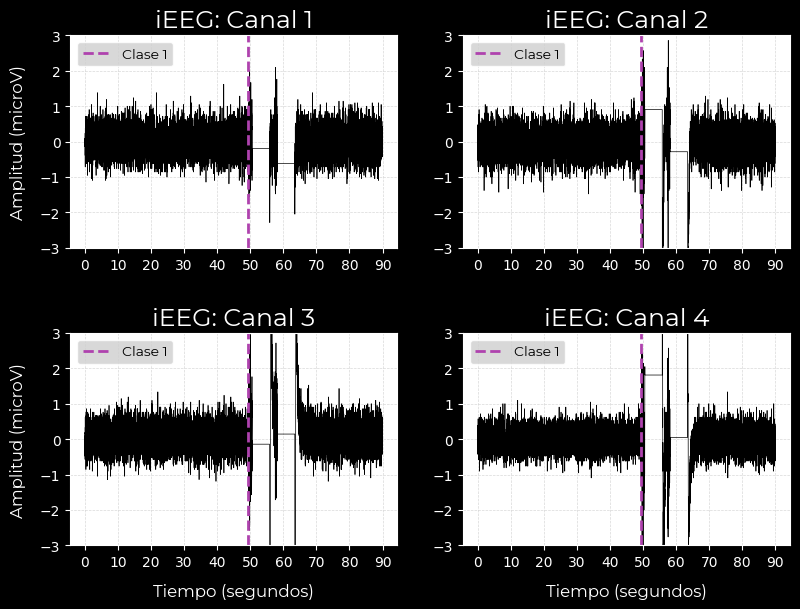

In [61]:
font_path  = '../03-Letra-plot/Montserrat-Regular.ttf'
montserrat = fm.FontProperties(fname=font_path)

fig, axs = plt.subplots(2, 2, figsize=(9, 6), facecolor='#000000')
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.1, hspace=0.4)

for ax in axs.flat:  
    # Cambiar el color de los bordes (spines) de los ejes a blanco
    ax.spines['bottom'].set_color('#FFFFFF')
    ax.spines['top'   ].set_color('#FFFFFF')
    ax.spines['left'  ].set_color('#FFFFFF')
    ax.spines['right' ].set_color('#FFFFFF')
    
    # Cambiar el color de los números (ticks) de los ejes a blanco
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

axs[0,0].plot(tiempo, ieeg[0,:], color='#000000', linestyle='-', linewidth=0.5)
axs[0,0].set_ylim([-3, 3])
axs[0,0].set_title('iEEG: Canal 1', fontproperties = montserrat, fontsize=18, color = '#FFFFFF')
axs[0,0].set_ylabel('Amplitud (microV)', fontsize=12, fontproperties=montserrat,labelpad=10, color = '#FFFFFF')
axs[0,0].set_xticks(ticks_x)
axs[0,0].grid(True, linestyle='--', linewidth=0.5, alpha=0.8, color='#CFCFCF')

# label
axs[0,0].axvline(x= 49.3752709, color='#AF42AE', linestyle = '--' , linewidth = 2, label='Clase 1')
axs[0,0].legend(loc='upper left', fontsize=12, prop = montserrat, facecolor='#CFCFCF', edgecolor='#FFFFFF', labelcolor='#000000')

axs[0,1].plot(tiempo, ieeg[1,:], color='#000000', linestyle='-', linewidth=0.5)
axs[0,1].set_ylim([-3, 3])
axs[0,1].set_title('iEEG: Canal 2', fontproperties = montserrat, fontsize=18, color = '#FFFFFF')
axs[0,1].set_xticks(ticks_x)
axs[0,1].grid(True, linestyle='--', linewidth=0.5, alpha=0.8, color='#CFCFCF')

# label
axs[0,1].axvline(x= 49.3752709, color='#AF42AE', linestyle = '--' , linewidth = 2, label='Clase 1')
axs[0,1].legend(loc='upper left', fontsize=12, prop = montserrat, facecolor='#CFCFCF', edgecolor='#FFFFFF', labelcolor='#000000')

axs[1,0].plot(tiempo, ieeg[2,:], color='#000000', linestyle='-', linewidth=0.5)
axs[1,0].set_ylim([-3, 3])
axs[1,0].set_title('iEEG: Canal 3', fontproperties = montserrat, fontsize=18, color = '#FFFFFF')
axs[1,0].set_xlabel('Tiempo (segundos)', fontsize=12, fontproperties = montserrat,labelpad=10, color = '#FFFFFF')
axs[1,0].set_ylabel('Amplitud (microV)', fontsize=12, fontproperties=montserrat,labelpad=10, color = '#FFFFFF')
axs[1,0].set_xticks(ticks_x)
axs[1,0].grid(True, linestyle='--', linewidth=0.5, alpha=0.8, color='#CFCFCF')

# label
axs[1,0].axvline(x= 49.3752709, color='#AF42AE', linestyle = '--' , linewidth = 2, label='Clase 1')
axs[1,0].legend(loc='upper left', fontsize=12, prop = montserrat, facecolor='#CFCFCF', edgecolor='#FFFFFF', labelcolor='#000000')

axs[1,1].plot(tiempo, ieeg[3,:], color='#000000', linestyle='-', linewidth=0.5)
axs[1,1].set_ylim([-3, 3])
axs[1,1].set_title('iEEG: Canal 4', fontproperties = montserrat, fontsize=18, color = '#FFFFFF')
axs[1,1].set_xlabel('Tiempo (segundos)', fontsize=12, fontproperties = montserrat,labelpad=10, color = '#FFFFFF')
axs[1,1].set_xticks(ticks_x)
axs[1,1].grid(True, linestyle='--', linewidth=0.5, alpha=0.8, color='#CFCFCF')

# label
axs[1,1].axvline(x= 49.3752709, color='#AF42AE', linestyle = '--' , linewidth = 2, label='Clase 1')
axs[1,1].legend(loc='upper left', fontsize=12, prop = montserrat, facecolor='#CFCFCF', edgecolor='#FFFFFF', labelcolor='#000000')

plt.show()

## SPEC

In [20]:
data_spec = '/media/martin/Disco2/Rns_Data/PITT_PI_SPEC/'

In [15]:
thalamus_1_pe = patient_thalamus_1[patient_thalamus_1['data'].apply(lambda x: x.split("_")[2]) == thalamus_epoch[2]]

In [16]:
thalamus_1_pe = SeizureDatasetLabelTime(
                                        file             = thalamus_1_pe,
                                        root_dir         = data_spec,
                                        transform        = None,
                                        target_transform = smoothing_label()  
                                       )

In [17]:
s = 3
spec, label = thalamus_1_pe[s]

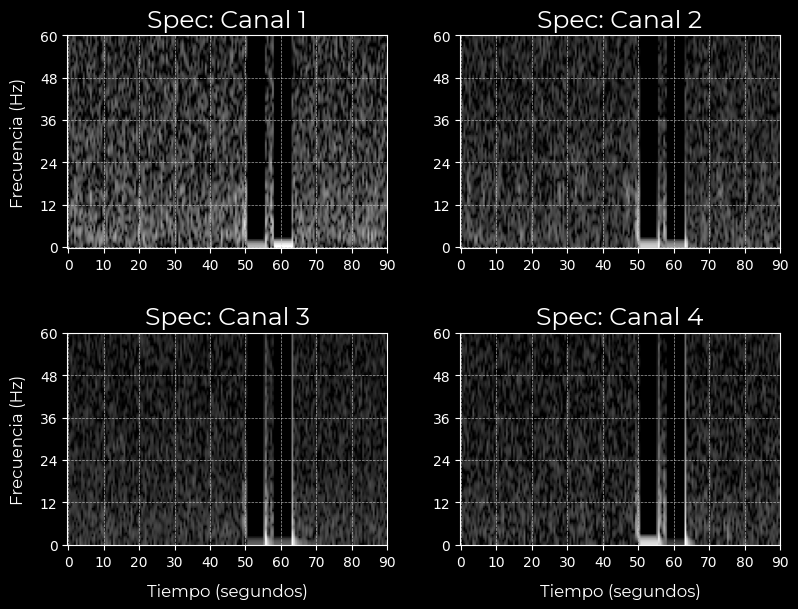

In [31]:
font_path  = '../03-Letra-plot/Montserrat-Regular.ttf'
montserrat = fm.FontProperties(fname=font_path)

fig, axs = plt.subplots(2, 2, figsize=(9, 6), facecolor='#000000')
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.1, hspace=0.4)

for ax in axs.flat:  
    # Cambiar el color de los bordes (spines) de los ejes a blanco
    ax.spines['bottom'].set_color('#FFFFFF')
    ax.spines['top'   ].set_color('#FFFFFF')
    ax.spines['left'  ].set_color('#FFFFFF')
    ax.spines['right' ].set_color('#FFFFFF')
    
    # Cambiar el color de los números (ticks) de los ejes a blanco
    ax.tick_params(axis='x', colors='#FFFFFF')
    ax.tick_params(axis='y', colors='#FFFFFF')

axs[0,0].imshow( spec[0,:,:], origin='lower', cmap = 'gray')
axs[0,0].set_title('Spec: Canal 1', fontproperties = montserrat, fontsize=18, color = '#FFFFFF')
axs[0,0].set_ylabel('Frecuencia (Hz)', fontsize=12, fontproperties=montserrat,labelpad=10, color = '#FFFFFF')
axs[0,0].grid(True, linestyle='--', linewidth=0.5, alpha=0.8, color='#CFCFCF')

# Etiquetas del eje X para que correspondan a 0-90 segundos
num_xticks       = 10
x_tick_positions = np.linspace(0, spec.shape[2], num_xticks)
x_tick_labels    = [str(int(x * 90 / (spec.shape[2] - 1))) for x in x_tick_positions]
axs[0,0].set_xticks(x_tick_positions)
axs[0,0].set_xticklabels(x_tick_labels)

# Etiquetas del eje Y para que correspondan a las frecuencias
num_yticks       = 6
y_tick_positions = np.linspace(0, spec.shape[1], num_yticks)
y_tick_labels    = [str(int(y * 60 / (spec.shape[1] - 1))) for y in y_tick_positions]
axs[0,0].set_yticks(y_tick_positions)
axs[0,0].set_yticklabels(y_tick_labels)


axs[0,1].imshow(spec[1,:,:], origin='lower', cmap = 'gray')
axs[0,1].set_title('Spec: Canal 2', fontproperties = montserrat, fontsize=18, color = '#FFFFFF')
axs[0,1].grid(True, linestyle='--', linewidth=0.5, alpha=0.8, color='#CFCFCF')

# Etiquetas del eje X para que correspondan a 0-90 segundos
num_xticks       = 10
x_tick_positions = np.linspace(0, spec.shape[2], num_xticks)
x_tick_labels    = [str(int(x * 90 / (spec.shape[2] - 1))) for x in x_tick_positions]
axs[0,1].set_xticks(x_tick_positions)
axs[0,1].set_xticklabels(x_tick_labels)

# Etiquetas del eje Y para que correspondan a las frecuencias
num_yticks       = 6
y_tick_positions = np.linspace(0, spec.shape[1], num_yticks)
y_tick_labels    = [str(int(y * 60 / (spec.shape[1] - 1))) for y in y_tick_positions]
axs[0,1].set_yticks(y_tick_positions)
axs[0,1].set_yticklabels(y_tick_labels)

axs[1,0].imshow(spec[2,:,:], origin='lower', cmap = 'gray')
axs[1,0].set_title('Spec: Canal 3', fontproperties = montserrat, fontsize=18, color = '#FFFFFF')
axs[1,0].set_xlabel('Tiempo (segundos)', fontsize=12, fontproperties = montserrat,labelpad=10, color = '#FFFFFF')
axs[1,0].set_ylabel('Frecuencia (Hz)', fontsize=12, fontproperties=montserrat,labelpad=10, color = '#FFFFFF')
axs[1,0].grid(True, linestyle='--', linewidth=0.5, alpha=0.8, color='#CFCFCF')

# Etiquetas del eje X para que correspondan a 0-90 segundos
num_xticks       = 10
x_tick_positions = np.linspace(0, spec.shape[2], num_xticks)
x_tick_labels    = [str(int(x * 90 / (spec.shape[2] - 1))) for x in x_tick_positions]
axs[1,0].set_xticks(x_tick_positions)
axs[1,0].set_xticklabels(x_tick_labels)

# Etiquetas del eje Y para que correspondan a las frecuencias
num_yticks       = 6
y_tick_positions = np.linspace(0, spec.shape[1], num_yticks)
y_tick_labels    = [str(int(y * 60 / (spec.shape[1] - 1))) for y in y_tick_positions]
axs[1,0].set_yticks(y_tick_positions)
axs[1,0].set_yticklabels(y_tick_labels)



axs[1,1].imshow( spec[3,:,:], origin='lower', cmap = 'gray')
axs[1,1].set_title('Spec: Canal 4', fontproperties = montserrat, fontsize=18, color = '#FFFFFF')
axs[1,1].set_xlabel('Tiempo (segundos)', fontsize=12, fontproperties = montserrat,labelpad=10, color = '#FFFFFF')
axs[1,1].grid(True, linestyle='--', linewidth=0.5, alpha=0.8, color='#CFCFCF')

# Etiquetas del eje X para que correspondan a 0-90 segundos
num_xticks       = 10
x_tick_positions = np.linspace(0, spec.shape[2], num_xticks)
x_tick_labels    = [str(int(x * 90 / (spec.shape[2] - 1))) for x in x_tick_positions]
axs[1,1].set_xticks(x_tick_positions)
axs[1,1].set_xticklabels(x_tick_labels)

# Etiquetas del eje Y para que correspondan a las frecuencias
num_yticks       = 6
y_tick_positions = np.linspace(0, spec.shape[1], num_yticks)
y_tick_labels    = [str(int(y * 60 / (spec.shape[1] - 1))) for y in y_tick_positions]
axs[1,1].set_yticks(y_tick_positions)
axs[1,1].set_yticklabels(y_tick_labels)

plt.show()

## spec and ieeg 

In [13]:
# iEEG

thalamus_1_pe = patient_thalamus_1[patient_thalamus_1['data'].apply(lambda x: x.split("_")[2]) == thalamus_epoch[2]]

thalamus_1_pe = SeizureDatasetLabelTimev2(
                                          file             = thalamus_1_pe,
                                          root_dir         = data_ieeg,
                                          transform        = None,
                                          target_transform = smoothing_label()  
                                         )

In [21]:
# SPEC

thalamus_1_pe = patient_thalamus_1[patient_thalamus_1['data'].apply(lambda x: x.split("_")[2]) == thalamus_epoch[2]]

thalamus_1_pe = SeizureDatasetLabelTime(
                                        file             = thalamus_1_pe,
                                        root_dir         = data_spec,
                                        transform        = None,
                                        target_transform = smoothing_label()  
                                       )

In [14]:
s = 3
ieeg, label = thalamus_1_pe[s]

[ 1.        49.3752709]


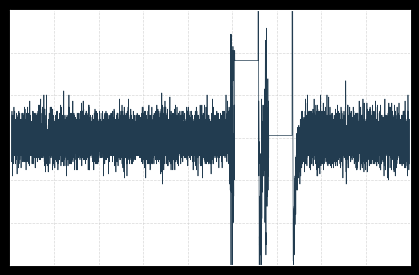

In [97]:
tiempo  = np.arange(len(ieeg[0,:])) * 0.004
ticks_x = np.arange(0, tiempo.max()+1, 10)

font_path  = '../03-Letra-plot/Montserrat-Regular.ttf'
montserrat = fm.FontProperties(fname=font_path)

fig, axs = plt.subplots(figsize=(5, 3), facecolor='#000000')
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.1, hspace=0.4)

axs.spines['bottom'].set_color('#FFFFFF')
axs.spines['top'   ].set_color('#FFFFFF')
axs.spines['left'  ].set_color('#FFFFFF')
axs.spines['right' ].set_color('#FFFFFF')
    
# Cambiar el color de los números (ticks) de los ejes a blanco
axs.tick_params(axis='x', colors='white')
axs.tick_params(axis='y', colors='white')

axs.set_ylim([-3, 3])
axs.set_xlim([tiempo.min(), tiempo.max()])
axs.tick_params(axis='both', which='both', length=0, labelleft=False, labelbottom=False)

axs.plot(tiempo, ieeg[3,:], color='#223C50', linestyle='-', linewidth=0.5)
axs.set_xticks(ticks_x)
axs.grid(True, linestyle='--', linewidth=0.5, alpha=0.8, color='#CFCFCF')

plt.savefig(out_address + '/iEEG_1_Canal4.svg', format='svg', bbox_inches='tight', dpi=300)

In [22]:
s = 3
spec, label = thalamus_1_pe[s]

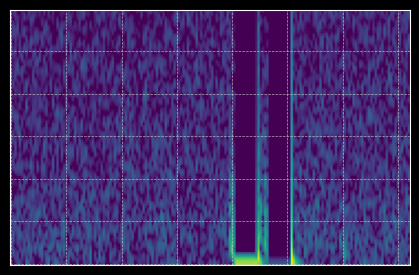

In [103]:
font_path  = '../03-Letra-plot/Montserrat-Regular.ttf'
montserrat = fm.FontProperties(fname=font_path)

fig, axs = plt.subplots(figsize=(5, 3), facecolor='#000000')
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.1, hspace=0.4)

axs.spines['bottom'].set_color('#FFFFFF')
axs.spines['top'   ].set_color('#FFFFFF')
axs.spines['left'  ].set_color('#FFFFFF')
axs.spines['right' ].set_color('#FFFFFF')
    
# Cambiar el color de los números (ticks) de los ejes a blanco
axs.tick_params(axis='x', colors='white')
axs.tick_params(axis='y', colors='white')

axs.imshow( spec[3,:,:], origin='lower', aspect = 'auto')
axs.grid(True, linestyle='--', linewidth=0.5, alpha=0.8, color='#CFCFCF')

axs.tick_params(axis='both', which='both', length=0, labelleft=False, labelbottom=False)
plt.savefig(out_address + '/Spec_1_Canal4.svg', format='svg', bbox_inches='tight', dpi=300)

plt.show()

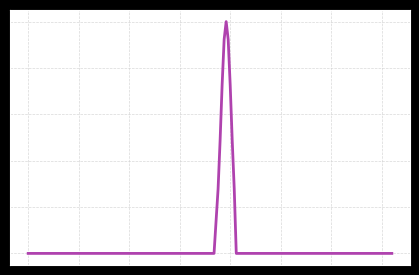

In [59]:
font_path  = '../03-Letra-plot/Montserrat-Regular.ttf'
montserrat = fm.FontProperties(fname=font_path)

fig, axs = plt.subplots(figsize=(5, 3), facecolor='#000000')
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.1, hspace=0.4)

axs.spines['bottom'].set_color('#FFFFFF')
axs.spines['top'   ].set_color('#FFFFFF')
axs.spines['left'  ].set_color('#FFFFFF')
axs.spines['right' ].set_color('#FFFFFF')
    
# Cambiar el color de los números (ticks) de los ejes a blanco
axs.tick_params(axis='x', colors='white')
axs.tick_params(axis='y', colors='white')

#axs.set_xlim([tiempo.min(), tiempo.max()])
axs.tick_params(axis='both', which='both', length=0, labelleft=False, labelbottom=False)

axs.plot(label, color='#AF42AE', linestyle='-', linewidth=2)
axs.grid(True, linestyle='--', linewidth=0.5, alpha=0.8, color='#CFCFCF')

plt.savefig(out_address + '/label.svg', format='svg', bbox_inches='tight', dpi=300)